                                  Week3:Basic Modeling

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from  sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,mean_absolute_error,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
# Load dataset (make sure file is in same folder as notebook)
df = pd.read_csv("Cleaned_dataset.csv")
print("Dataset Loaded:", df.shape)


Dataset Loaded: (1300, 6)


In [45]:
import pandas as pd

baseline = pd.Series(y_train).value_counts().max() / len(y_train)
print("Baseline Accuracy:", baseline)

Baseline Accuracy: 0.25961538461538464


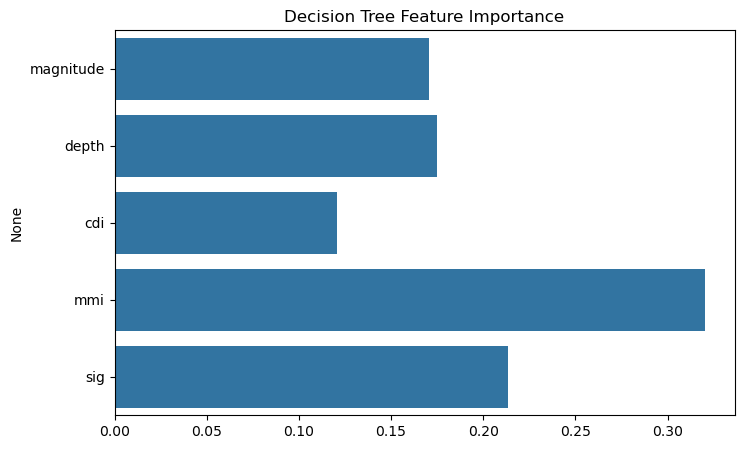

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(x=dt.feature_importances_, y=X.columns)
plt.title("Decision Tree Feature Importance")
plt.show()


In [29]:
preferred = ['alert','Alert','label','Label','class','Class','target']
target = None
for col in preferred:
    if col in df.columns:
        target = col
        break

if target is None:
    small_unique = [c for c in df.columns if df[c].nunique() <= 10]
    target = small_unique[0] if small_unique else df.columns[-1]

print("Target column:", target)

Target column: alert


In [30]:
# ---- X and y ----
y = df[target]
X = df.drop(columns=[target])

if y.dtype == 'object':
    y = pd.factorize(y)[0]

if df[target].nunique() > 10:
    median_val = df[target].median()
    y = (df[target] > median_val).astype(int)


In [31]:
# Preprocess
X = pd.get_dummies(X, drop_first=True)

for col in X.columns:
    if X[col].isnull().sum() > 0:
        if np.issubdtype(X[col].dtype, np.number):
            X[col].fillna(X[col].median(), inplace=True)
        else:
            X[col].fillna(X[col].mode()[0], inplace=True)

num_cols = X.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])


In [32]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [33]:
# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
pred_log = logreg.predict(X_test)



In [34]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
pred_dt = dt.predict(X_test)

In [35]:
# Metrics
print("\n--- Logistic Regression ---")
print("Accuracy:", accuracy_score(y_test, pred_log))
print("MAE:", mean_absolute_error(y_test, pred_log))
print(classification_report(y_test, pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_log))

print("\n--- Decision Tree ---")
print("Accuracy:", accuracy_score(y_test, pred_dt))
print("MAE:", mean_absolute_error(y_test, pred_dt))
print(classification_report(y_test, pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_dt))


--- Logistic Regression ---
Accuracy: 0.6307692307692307
MAE: 0.4307692307692308
              precision    recall  f1-score   support

           0       0.78      0.78      0.78        65
           1       0.44      0.51      0.47        65
           2       0.60      0.43      0.50        65
           3       0.71      0.80      0.75        65

    accuracy                           0.63       260
   macro avg       0.63      0.63      0.63       260
weighted avg       0.63      0.63      0.63       260

Confusion Matrix:
 [[51 12  1  1]
 [14 33 10  8]
 [ 0 25 28 12]
 [ 0  5  8 52]]

--- Decision Tree ---
Accuracy: 0.8423076923076923
MAE: 0.19615384615384615
              precision    recall  f1-score   support

           0       0.91      0.80      0.85        65
           1       0.78      0.83      0.81        65
           2       0.83      0.82      0.82        65
           3       0.86      0.92      0.89        65

    accuracy                           0.84       260


In [59]:


def color_text_bg(text, color):
    colors = {
        "green": "\033[92m\033[42m",   
        "red": "\033[91m\033[41m",     
        "yellow": "\033[93m\033[43m",  
        "reset": "\033[0m"
    }
    return f"{colors[color]}{text}{colors['reset']}"


def colored_prediction(pred):
    if pred == 0:
        return color_text_bg(" LOW RISK (GREEN) ", "green")
    elif pred == 1:
        return color_text_bg(" HIGH ALERT (RED) ", "red")
    elif pred == 2:
        return color_text_bg(" MODERATE (YELLOW) ", "yellow")
    else:
        return str(pred)


print("\n--- COLORED PREDICTIONS WITH BACKGROUND ---")

print("\nLogistic Regression:")
for i, p in enumerate(log_preds):
    print(f"Sample {i+1}: {colored_prediction(p)}")

print("\nDecision Tree:")
for i, p in enumerate(dt_preds):
    print(f"Sample {i+1}: {colored_prediction(p)}")



--- COLORED PREDICTIONS WITH BACKGROUND ---

Logistic Regression:
Sample 1:  MODERATE (YELLOW) 
Sample 2:  MODERATE (YELLOW) 
Sample 3:  MODERATE (YELLOW) 
Sample 4: 3
Sample 5:  MODERATE (YELLOW) 

Decision Tree:
Sample 1:  MODERATE (YELLOW) 
Sample 2:  MODERATE (YELLOW) 
Sample 3:  MODERATE (YELLOW) 
Sample 4:  MODERATE (YELLOW) 
Sample 5:  MODERATE (YELLOW) 


                              WEEK4:ADVANCED MODELLING 

In [37]:
#Train a Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)


y_pred = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Random Forest Accuracy: 0.9153846153846154
              precision    recall  f1-score   support

           0       0.93      0.84      0.88        68
           1       0.84      0.93      0.88        55
           2       0.91      0.95      0.93        73
           3       0.98      0.95      0.97        64

    accuracy                           0.92       260
   macro avg       0.92      0.92      0.91       260
weighted avg       0.92      0.92      0.92       260



In [56]:
# ---- TRAIN GRADIENT BOOSTING MODEL ----
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

# ---- PREDICT ----
y_pred = gb.predict(X_test)

# ---- METRICS ----
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.9153846153846154
Precision: 0.9157343527021311
Recall: 0.9153846153846154
F1 Score: 0.9146525494613105

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.82      0.87        68
           1       0.86      0.91      0.88        55
           2       0.92      0.95      0.93        73
           3       0.95      0.98      0.97        64

    accuracy                           0.92       260
   macro avg       0.91      0.92      0.91       260
weighted avg       0.92      0.92      0.91       260



In [39]:
#cross validation
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf, X, y, cv=5)
print("Random Forest CV Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())


Random Forest CV Scores: [0.89615385 0.90384615 0.89615385 0.90384615 0.94230769]
Mean CV Score: 0.9084615384615384


In [40]:
#Hyperparameter Tuning (Random Forest)
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42),
                    param_grid, cv=3, n_jobs=-1, verbose=1)

grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
best_rf = grid.best_estimator_

y_pred_best = best_rf.predict(X_test)
print("Best RF Accuracy:", accuracy_score(y_test, y_pred_best))


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best RF Accuracy: 0.9115384615384615


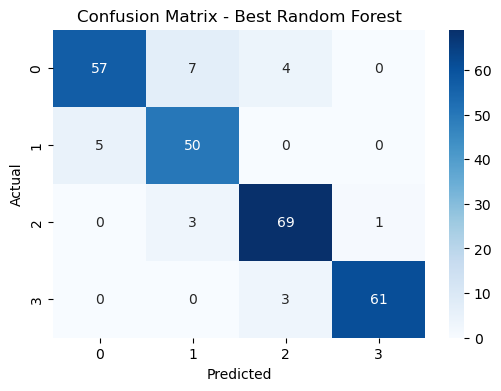

In [44]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Best Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


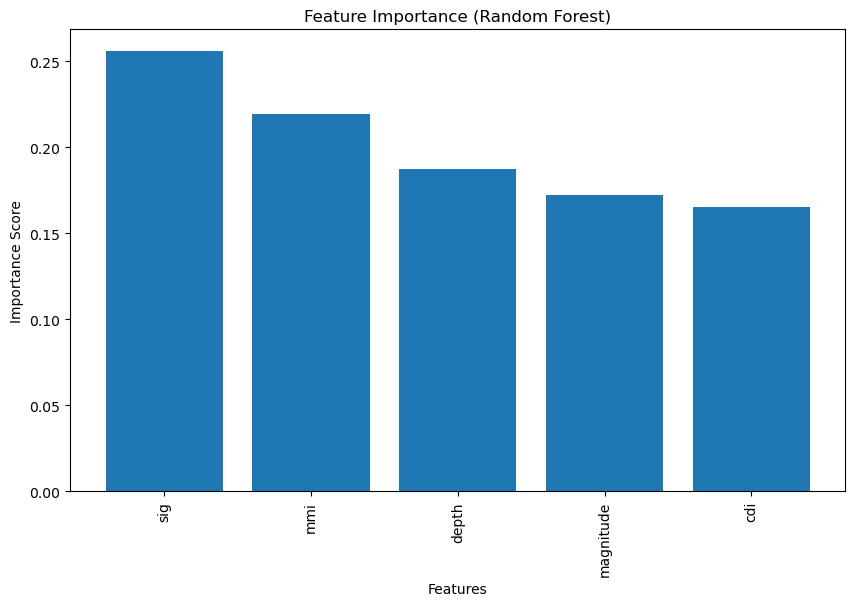

In [43]:
#feature importance graph
import numpy as np

importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(10,6))
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), features[indices], rotation=90)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()


In [58]:
# ---- COLOR OUTPUT WITH BACKGROUND COLORS ----

def color_text_bg(text, color):
    colors = {
        "green": "\033[92m\033[42m",
        "red": "\033[91m\033[41m",     
        "yellow": "\033[93m\033[43m",
        "reset": "\033[0m"
    }
    return f"{colors[color]}{text}{colors['reset']}"


def colored_prediction(pred):
    if pred == 0:
        return color_text_bg(" LOW RISK (GREEN) ", "green")
    elif pred == 1:
        return color_text_bg(" HIGH ALERT (RED) ", "red")
    elif pred == 2:
        return color_text_bg(" MODERATE (YELLOW) ", "yellow")
    else:
        return str(pred)

print("\n--- ADVANCED MODEL PREDICTIONS ---")

rf_preds = rf.predict(sample_input)
gb_preds = gb.predict(sample_input)

print("\nRandom Forest:")
for i, p in enumerate(rf_preds):
    print(f"Sample {i+1}: {colored_prediction(p)}")

print("\nGradient Boosting:")
for i, p in enumerate(gb_preds):
    print(f"Sample {i+1}: {colored_prediction(p)}")
        



--- ADVANCED MODEL PREDICTIONS ---

Random Forest:
Sample 1:  MODERATE (YELLOW) 
Sample 2:  MODERATE (YELLOW) 
Sample 3:  MODERATE (YELLOW) 
Sample 4:  MODERATE (YELLOW) 
Sample 5:  MODERATE (YELLOW) 

Gradient Boosting:
Sample 1:  MODERATE (YELLOW) 
Sample 2:  MODERATE (YELLOW) 
Sample 3:  MODERATE (YELLOW) 
Sample 4:  MODERATE (YELLOW) 
Sample 5:  MODERATE (YELLOW) 
